### Ml training

In [2]:
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

/home/sparrow/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


/home/sparrow/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


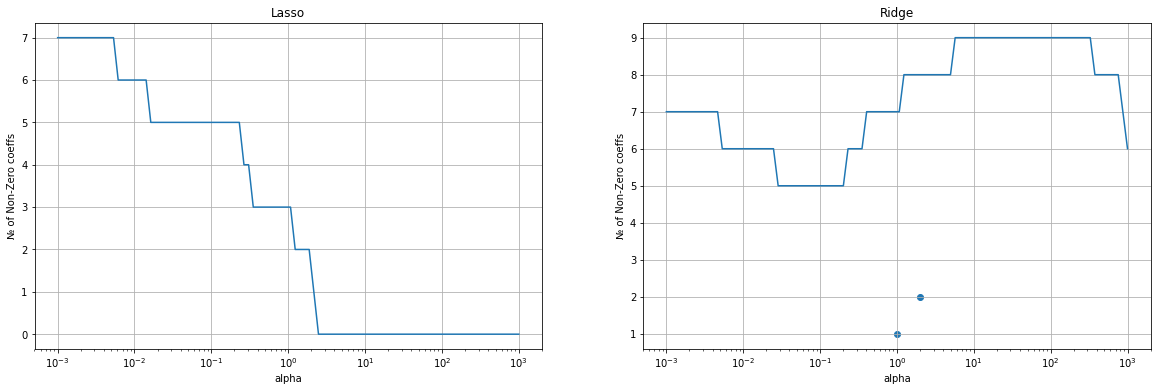

In [4]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt


eps = 0.25


data = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

alphas = np.logspace(-3, 3, 100)

plt.figure(figsize=(20, 6))

clf, clf1 = Ridge(), Lasso()
coeffs, l_coeffs = [], []

for a in alphas:
    clf1.set_params(alpha=a)
    clf1.fit(X_train, y_train)
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)

    cnt1 = np.abs(clf1.coef_ > eps).sum()
    cnt = np.abs(clf.coef_ > eps).sum()

    l_coeffs.append(cnt1)
    coeffs.append(cnt)

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, l_coeffs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('№ of Non-Zero coeffs')
plt.title('Lasso')
plt.axis('tight')
ax.grid()

ax = plt.subplot(122)
ax.scatter([1,2], [1, 2])
ax.set_ylim([0.0, 10.0])
ax.plot(alphas, coeffs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('№ of Non-Zero coeffs')
plt.title('Ridge')
plt.axis('tight')
ax.grid()

plt.show()

### Compute metrics

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

clf = Ridge()
clf.fit(X_train, y_train)

MAE = (mean_absolute_error(y_test, clf.predict(X_test)))
RMSE = (np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))) 
R2 = (r2_score(y_test, clf.predict(X_test)))

print("RMSE: ", RMSE)
print("MAE :", MAE)
print("R2 :", R2)

RMSE:  58.3044151277
MAE : 49.6028460728
R2 : 0.359899386837


### Correlation between reg. coeff and metrics

best RMSE score:  55.6598107854
default RMSE score :  58.3044151277

best MAE score:  47.0735527455
default MAE score:  49.6028460728

best R2 score:  0.416650529273
default R2 score:  0.359899386837



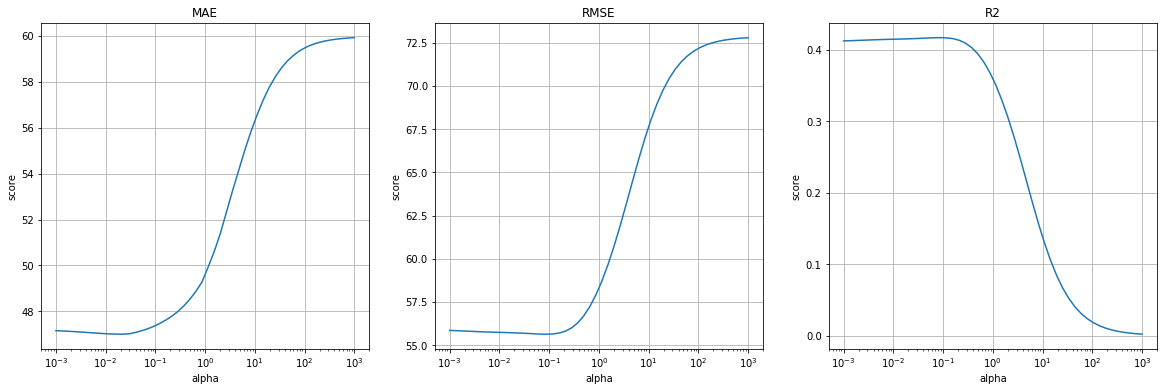

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer

def find_best_alphas(alphas, X_train, y_train, RMSE_func):
    tuned_alphas = [{'alpha': alphas}]

    RMSEscorer = make_scorer(RMSE_func)
    RMSE = GridSearchCV(Ridge(), tuned_alphas, RMSEscorer)
    RMSE.fit(X_train, y_train)
    bestRMSE = RMSE.best_params_['alpha']

    MAE = GridSearchCV(Ridge(), tuned_alphas, 'neg_mean_absolute_error')
    MAE.fit(X_train, y_train)
    bestMAE = MAE.best_params_['alpha']

    R2 = GridSearchCV(Ridge(), tuned_alphas, 'r2')
    R2.fit(X_train, y_train)
    bestR2 = R2.best_params_['alpha']

    ans = dict()
    ans['RMSE'], ans['MAE'], ans['R2'] = bestRMSE, bestMAE, bestR2

    return ans


def compute_best_score(best_alphas, X_train, y_train, X_test, y_test):
    clf = Ridge()

    clf.set_params(alpha=best_alphas['RMSE'])
    clf.fit(X_train, y_train)
    RMSE = np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))
    print('best RMSE score: ', RMSE)
    print('default RMSE score :  58.3044151277')
    print()

    clf.set_params(alpha=best_alphas['MAE'])
    clf.fit(X_train, y_train)
    MAE = mean_absolute_error(y_test, clf.predict(X_test))
    print('best MAE score: ', MAE)
    print('default MAE score:  49.6028460728')
    print()

    clf.set_params(alpha=best_alphas['R2'])
    clf.fit(X_train, y_train)
    R2 = r2_score(y_test, clf.predict(X_test))
    print('best R2 score: ', R2)
    print('default R2 score:  0.359899386837')
    print()

    return


MAEscores, RMSEscores, R2scores = [], [], []
RMSE_func = lambda *args: -1 * mean_squared_error(*args) ** (1 / 2)
alphas = np.logspace(-3, 3)

best_alphas = find_best_alphas(alphas, X_train, y_train, RMSE_func)
compute_best_score(best_alphas, X_train, y_train, X_test, y_test)

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    MAEscores.append(mean_absolute_error(y_test, clf.predict(X_test)));
    RMSEscores.append(np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))
    R2scores.append(r2_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(20, 6))

plt.subplot(131)
ax = plt.gca()
ax.plot(alphas, MAEscores)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('MAE')
plt.axis('tight')
ax.grid()

plt.subplot(132)
ax = plt.gca()
ax.plot(alphas, RMSEscores)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('RMSE')
plt.axis('tight')
ax.grid()

plt.subplot(133)
ax = plt.gca()
ax.plot(alphas, R2scores)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('R2')
plt.axis('tight')
ax.grid()

plt.show()

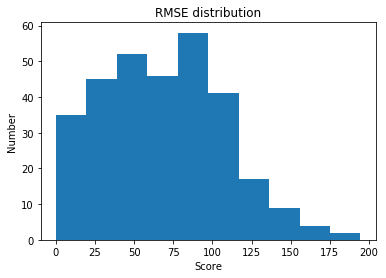

In [7]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(clf, X_train, y_train, cv=X_train.shape[0])
RMSE = np.array([mean_squared_error([y_train[i]], [predicted[i]]) ** 0.5 for i in range(X_train.shape[0])])

plt.hist(RMSE)
plt.xlabel('Score')
plt.ylabel('Number')
plt.title('RMSE distribution')
plt.show()

threshold = 125
indices = np.where(RMSE > threshold)[0]
X_new = np.delete(X_train, indices, axis=0)
y_new = np.delete(y_train, indices)

In [8]:
clf_new = Ridge().fit(X_new, y_new)

predicted_new = clf_new.predict(X_test)
predicted = Ridge().fit(X_train, y_train).predict(X_test)
    
MAE = (mean_absolute_error(y_test, predicted))
RMSE = (np.sqrt(mean_squared_error(y_test, predicted)))
R2 = (r2_score(y_test, predicted))

MAE_new = (mean_absolute_error(y_test, predicted_new))
RMSE_new = (np.sqrt(mean_squared_error(y_test, predicted_new)))
R2_new = (r2_score(y_test,predicted_new))
    
print("RMSE:", RMSE)
print("New RMSE:", RMSE_new)
print()
print("MAE:", MAE)
print("New MAE:", MAE_new)
print()
print("R2:", R2)
print("New R2:", R2_new)

RMSE: 58.3044151277
New RMSE: 61.4478560267

MAE: 49.6028460728
New MAE: 51.5959664338

R2: 0.359899386837
New R2: 0.289017639484


### LogReg

In [9]:
from sklearn.base import BaseEstimator
from scipy.special import expit
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler
import numpy as np
from timeit import default_timer
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


class LogReg(BaseEstimator):
    def __init__(self, lambda_1=0.0, lambda_2=1.0, gd_type='stochastic',
                 tolerance=1e-6, max_iter=1000, w0=None, alpha=1e-3):
     
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.loss_history = None
        self.timings = []

    def fit(self, X, y):

        self.loss_history = []
        
        self.w = np.zeros(X.shape[1])
        if self.w0 is not None: 
            self.w = self.w0      
        
        l = y.shape[0]
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        start = default_timer()

        for i in range(self.max_iter):
            if self.gd_type == 'full':
                step = self.calc_gradient(X, y)
            else:
                i = np.random.choice(l)
                step = self.calc_gradient(X[i], y[i:i+1])

            if euclidean(self.w, self.w - self.alpha * step) < self.tolerance:
                break

            self.loss_history.append(self.calc_loss(X, y))
            self.timings.append(default_timer() - start)
            
            self.w -= self.alpha * step

        return self

    def predict_proba(self, X):
  
        if self.w is None:
            raise Exception('Not trained yet')

        ans = np.zeros((X.shape[0], 2))

        ans[:, 1] = expit(np.dot(X[:, ], self.w))
        ans[:, 0] = 1 - ans[:, 1]
        return ans

    def calc_gradient(self, X, y):

        FGR = (- y[:, None] * X * expit((-y * np.dot(X, self.w)))[:, None] +
               self.lambda_2 * self.w)
        FGR = np.mean(FGR, axis=0)
        return FGR

    def calc_loss(self, X, y):
        
        l = X.shape[0]
        Q = (1/l * (np.logaddexp(0, -1 * y[:] * np.dot(X[:, ], self.w))).sum() +
             self.lambda_2/2 * np.dot(self.w, self.w))
        return Q

/home/sparrow/.local/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


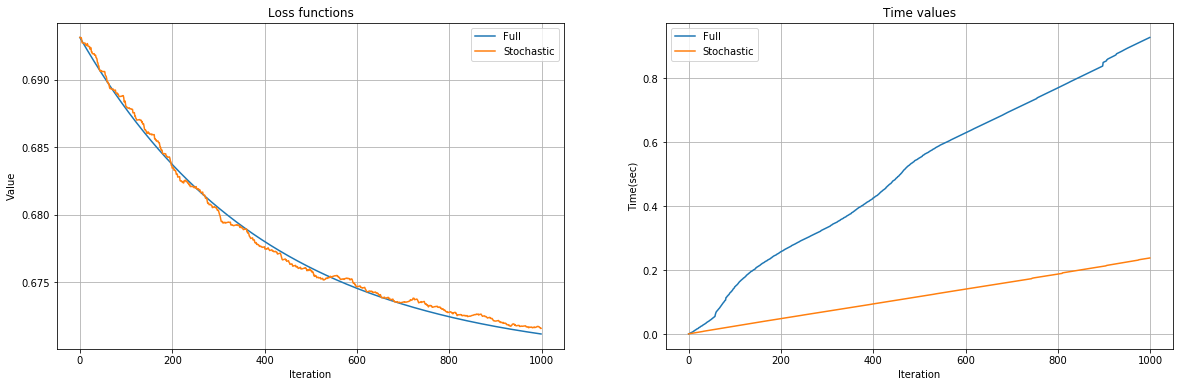

In [10]:
StochLR = LogReg()
FullLR = LogReg()

X, y = make_classification(n_samples=2000, n_features=30)
FullLR.gd_type = 'full'

StochLR.fit(X, y)

FullLR.fit(X, y)

StochLR.loss_history = np.array(StochLR.loss_history)
StochLR.timings = np.array(StochLR.timings)
FullLR.timings = np.array(FullLR.timings)
FullLR.loss_history = np.array(FullLR.loss_history)
# print(StochLR.loss_history.shape)

iters = np.arange(FullLR.max_iter)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.plot(iters, FullLR.loss_history, label=u"Full")
ax1.plot(iters, StochLR.loss_history, label=u"Stochastic")
ax1.set_title(u"Loss functions")
ax1.set_xlabel(u"Iteration")
ax1.set_ylabel(u"Value")
ax1.grid()
ax1.legend()

ax2.plot(iters, FullLR.timings, label=u"Full")
ax2.plot(iters, StochLR.timings, label=u"Stochastic")
ax2.set_title(u"Time values")
ax2.set_xlabel(u"Iteration")
ax2.set_ylabel(u"Time(sec)")
ax2.grid()
ax2.legend()

f.show()

### Binary calssification problem from Kaggle [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction)

In [11]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

In [12]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
clf = LogReg(tolerance=1e-6, max_iter=1000, gd_type='full')
#clf.set_params(tol=1e-6, max_iter=1000)
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)[:, 1]

PR-AUC:  0.602979153621
ROC-AUC:  0.61873247251


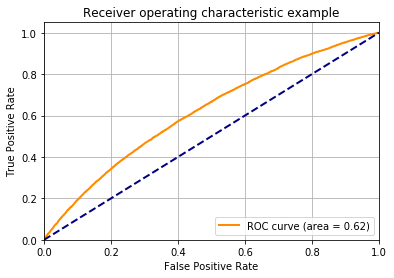

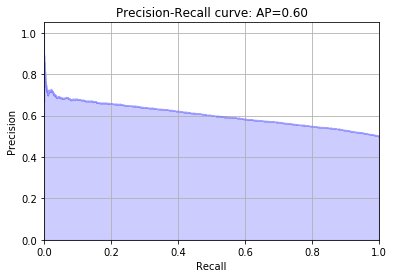

In [15]:
from sklearn.metrics import precision_recall_curve, roc_curve, average_precision_score, roc_auc_score


# Compute PR-AUC, ROC-AUC
PR_AUC = average_precision_score(y_test, y_score)
ROC_AUC = roc_auc_score(y_test, y_score)

print("PR-AUC: ", PR_AUC)
print("ROC-AUC: ", ROC_AUC)

fpr, tpr, _ = roc_curve(y_test, y_score)
precision, recall, threshold = precision_recall_curve(y_test, y_score)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % ROC_AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid()
plt.show()

plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
        PR_AUC))
plt.grid()

plt.show()

In [17]:
from sklearn.metrics import confusion_matrix

i = (np.abs(recall-0.7)).argmin()

print("Threshold for 0.7 recall: ", threshold[i])
print("Precision for 0.7 recall: ", precision[i])
print()
print("Confusion matrix for the threshold above:\n\n", confusion_matrix(y_test, np.array(y_score>threshold[i])))

Threshold for 0.7 recall:  0.491350373089
Precision for 0.7 recall:  0.567022500121

Confusion matrix for the threshold above:

 [[23266 26728]
 [15002 35004]]


### Correlation between reg. coeff. and GD's

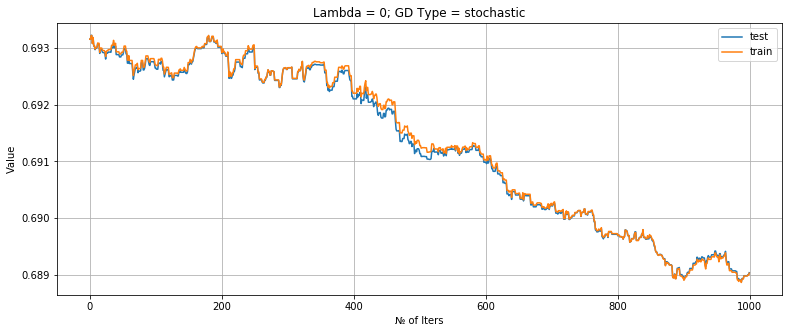

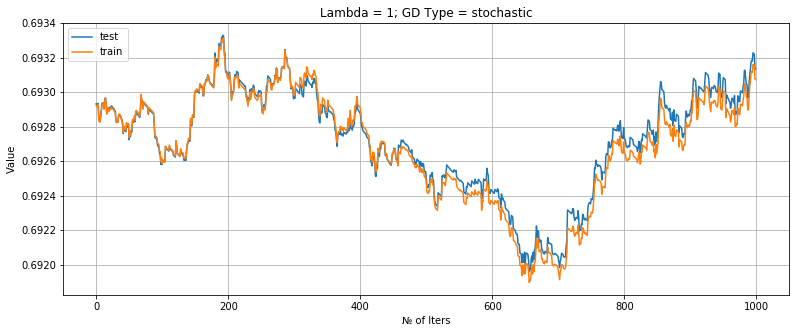

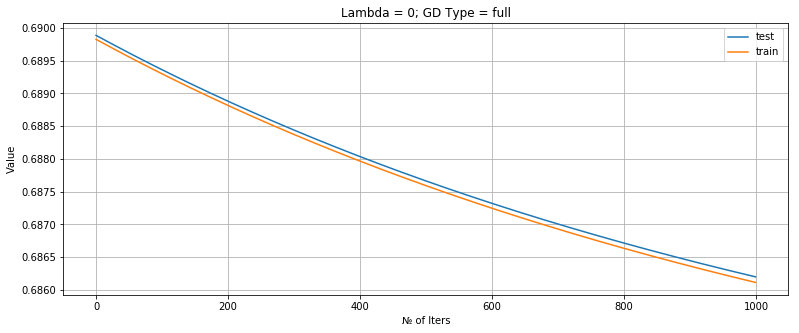

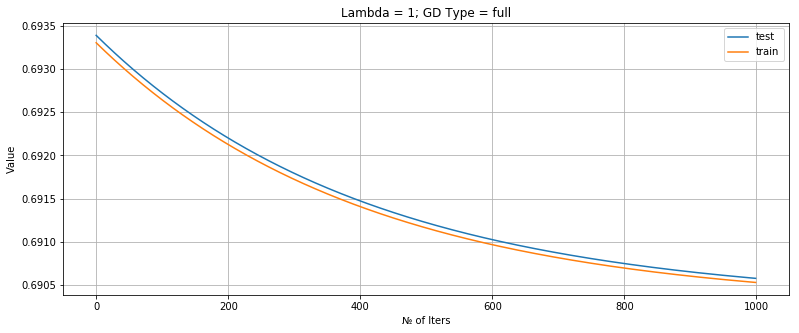

In [18]:
n = 1000

def make_plot(gd_type, lambda2, w):
    t_loss, tr_loss= [], []
    
    for i in range(n):
        
        clf = LogReg(max_iter = 1, gd_type=gd_type, lambda_2=lambda2, w0=w)
        clf.fit(X_train, y_train)
        
        t_loss.append(clf.calc_loss(X_test, y_test))
        tr_loss.append(clf.calc_loss(X_train, y_train))
        
        w = clf.w
    
    plt.figure(figsize=(13, 5))
    plt.plot(t_loss, label=u'test')
    plt.plot(tr_loss, label=u'train')
    plt.xlabel('№ of Iters')
    plt.ylabel('Value')
    plt.title('Lambda = ' + str(lambda2) + '; GD Type = ' + gd_type)
    plt.grid()
    plt.legend()
    
    plt.show()
    return

w = np.zeros(X_test.shape[1])
make_plot('stochastic', 0, w)
make_plot('stochastic', 1, w)
make_plot('full', 0, w)
make_plot('full', 1, w)

### 3. SVM

In [19]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
y_score = clf.predict(X_test)

PR_AUC_new = average_precision_score(y_test, y_score)
ROC_AUC_new = roc_auc_score(y_test, y_score)

print("PR-AUC: ", PR_AUC)
print("new PR-AUC: ", PR_AUC_new)
print()
print("ROC-AUC: ", ROC_AUC)
print("new ROC-AUC: ", ROC_AUC_new)

PR-AUC:  0.602979153621
new PR-AUC:  0.552402798774

ROC-AUC:  0.61873247251
new ROC-AUC:  0.587825110865


In [21]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X_train, y_train = make_classification(n_samples=200, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1)
X_train = StandardScaler().fit_transform(X_train)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

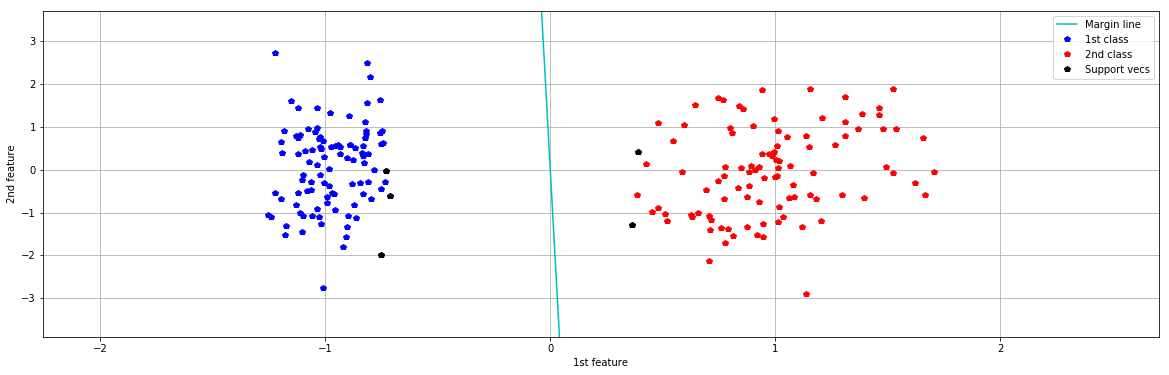

In [22]:
lim = 1


def plot_classes(plt, X, y):
    zeros = np.where(y == 0)
    ones = np.where(y == 1)
    plt.plot(X[zeros, 0][0], X[zeros, 1][0], 'bp', label=u"1st class")
    plt.plot(X[ones, 0][0], X[ones, 1][0], 'rp', label=u"2nd class")
    return


def plot_support_vectors(plt, clf):
    vecs = clf.support_vectors_
    #print(vecs[:, 0], '\n')
    #print(vecs[:, 1], '\n')

    plt.plot(vecs[:, 0], vecs[:, 1], 'kp', label=u"Support vecs")
  

lb = np.min(X_train[:, 0]) - lim
rb = np.max(X_train[:, 0]) + lim
db = np.min(X_train[:, 1]) - lim
ub = np.max(X_train[:, 1]) + lim

plt.figure(figsize=(20, 6))

alpha = clf.coef_[0,0] / clf.coef_[0, 1]
plt.plot([lb, rb], [lb*alpha, rb*alpha], 'c-', label=u"Margin line")

plot_classes(plt, X_train, y_train)
plot_support_vectors(plt, clf)


plt.xlim(lb, rb)
plt.ylim(db, ub)
plt.xlabel(u"1st feature")
plt.ylabel(u"2nd feature")
plt.legend()
plt.grid()

plt.show()

In [23]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) # - -> +
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) #np.min -> np.mean
    plt.plot(bin_middle_points, bin_real_ratios)

/home/sparrow/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sparrow/.local/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


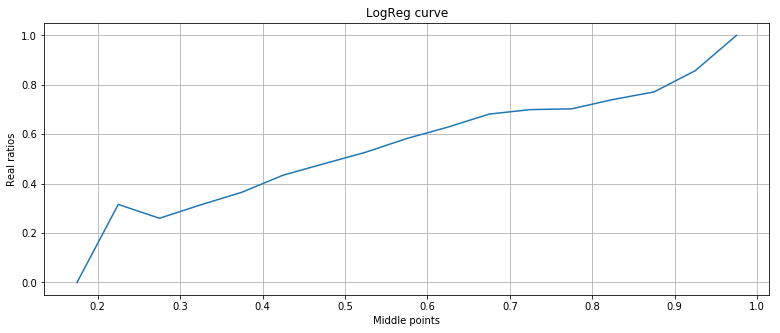

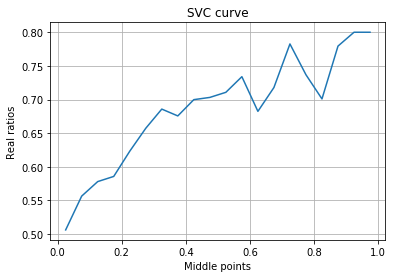

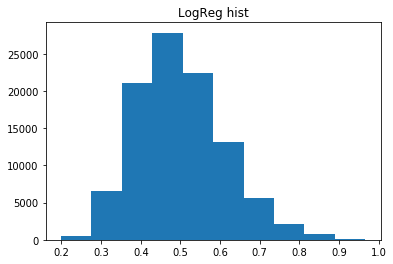

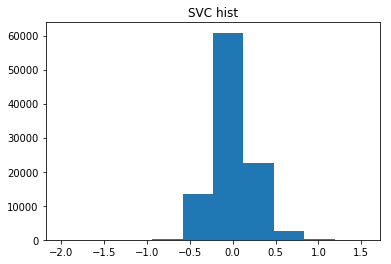

In [24]:
from sklearn.linear_model import LogisticRegression as LR

data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

clf = LR()
clf.set_params(tol=1e-6)
clf.fit(X_train, y_train)

svc = LinearSVC()
svc.fit(X_train, y_train)

LR_predicted = clf.predict_proba(X_test)[:, 1]
SVC_predicted = svc.decision_function(X_test)

plt.figure(figsize=(13, 5))

plot_calibration_curve(y_test, LR_predicted)
plt.xlabel('Middle points')
plt.ylabel('Real ratios')
plt.title('LogReg curve')
plt.grid()
plt.show()

plot_calibration_curve(y_test, SVC_predicted)
plt.xlabel('Middle points')
plt.ylabel('Real ratios')
plt.title('SVC curve')
plt.grid()
plt.show()

plt.title('LogReg hist')
plt.hist(LR_predicted)
plt.show()

plt.title('SVC hist')
plt.hist(SVC_predicted)
plt.show()

/home/sparrow/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sparrow/.local/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


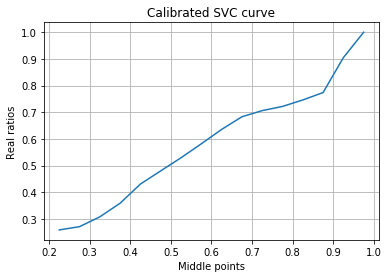

In [26]:
from sklearn.calibration import CalibratedClassifierCV

ccCV = CalibratedClassifierCV(LinearSVC())
ccCV.fit(X_train, y_train)
y_score = ccCV.predict_proba(X_test)[:,1]

plot_calibration_curve(y_test, y_score)

plt.title("Calibrated SVC curve")
plt.xlabel('Middle points')
plt.ylabel('Real ratios')
plt.grid()
plt.show()